# Bengaluru House Price Prediction

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df1=pd.read_csv("Bengaluru_House_Data.csv")
df1.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [3]:
df1.shape    #gives no of rows and columns

(13320, 9)

In [4]:
df1.groupby('area_type')

In [5]:
df1.groupby('area_type')['area_type']

In [6]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
#dropping a few columns which we think are NOT important for a certain problem
df2=df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
# data cleaning process begins
#--we deal with the unavailable (NaN) values

df2.isnull().sum()   #tells no of rows where particular column is empty

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
    # we can either drop the NaN values or fill them
      # here since we have total of 13320 rows and unavailable values (e.g., of bath are only 73) very SMALL compared to the total rows, therefore we just drop the null values
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df3.shape

(13246, 5)

In [11]:
    #   we want to know what all types are there in the 'size' column
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
   # we create a new column 'bhk' which will contain the bhk values.
    # e.g, if 3 bhk, then 'bhk' column will have value 3
    
    #for that, we need to apply a function (we are using lambda function here)
df3['bhk']=df3['size'].apply( lambda x: x.split(' ')[0] )  # x is the full string , e.g, " 2 BHK", and [0] gives us the 1st token i.e., "2", here.

C:\Users\NC\AppData\Local\Temp\ipykernel_24488\184057418.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply( lambda x: x.split(' ')[0] )  # x is the full string , e.g, " 2 BHK", and [0] gives us the 1st token i.e., "2", here.


In [13]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df3['bhk'].unique()   #to see the distinct values in the column "bhk"

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [15]:
#convert "bhk" column values from str/obj to int
df3=df3.astype({'bhk':'int'})

In [16]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [17]:
#let's dig around the total_sqft column
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
#we see there are some elements like '1133-1384',means it's a range,...
#so, one way to convert it into a single value is:
#    we can find the average of these 2 numbers and replace the range with the average


#now, first, let's see how many range likes are there in the 'total_sqft' column

def is_float(x):     #function to see if a given value in 'total_sqft' col is float or not
    try:     #we will try to convert the value into float
        float(x)
    except:  #if not valid value, then it comes here in the except block
        return False
    return True

In [19]:
df3[~df3['total_sqft'].apply(is_float)]    #negate(~) used,,,to get the invalid values in the 'total_sqft' column

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [20]:
df3[~df3['total_sqft'].apply(is_float)].head(10)    #we can see there are other types of values also (sq. meter, perch, etc) in the 'total_sqft' column

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [21]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return((float(tokens[0])+float(tokens[1]))/2)  #converting each no. into float and taking their average
    try:
        return float(x)   #try to convert a normal number into float
    except:
        return None

In [22]:
   #   testing the function

In [23]:
convert_sqft_to_num('2166')

2166.0

In [24]:
convert_sqft_to_num('2100-2166')

2133.0

In [25]:
convert_sqft_to_num('34.46Sq. Meter')

In [26]:
#creating a copy of df3..... .copy() creates a deep copy
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [27]:
   #to look at particular index
#df4.loc[410]    # dataframe_name . loc[index]

print(df4.loc[410],"       ----> see the Sq. Meter value has been removed. \n\n\n")
print(df4.loc[30],"             --->see the average has been done -",((2100+2850)/2))

location      Kengeri
size            1 BHK
total_sqft        NaN
bath              1.0
price            18.5
bhk                 1
Name: 410, dtype: object        ----> see the Sq. Meter value has been removed. 



location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object              --->see the average has been done - 2475.0


In [28]:
# copying this dataframe into a new one
df5=df4.copy()   #creates a deep copy

In [29]:
#we know, in real-estate market, price per square feet is very much important
   # and also,this feature will help us do outlier cleaning (outlier detection & removal) in the later stage
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']   #  we did *100000 (1 lac) bcoz price is in lakh
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [30]:
# now, let's explore 'location' column
print(df5.location.unique())        #gives names of distinct 'location's
print(len(df5.location.unique()))   # count the number of distinct 'location's

['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']
1304


In [31]:
####------  1304 'location's are just too many
#      this is called Dimensionality Curse
#      this is a high dimensionality problem

# ----  there are techniques available to reduce the dimension
  # one of the effective techniques is to come up with this other category
    #    other category means, when we have 1304 location, there will be some locations that will have 1 or 2 datapoints

#   removing (if any) both leading and trailing characters(here, spaces) from the string
df5.location=df5.location.apply(lambda x: x.strip())  #to remove spaces --> ()

location_stats=df5.groupby('location')['location'].agg('count')
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [32]:
# let's do--> any location with less than 10 datapoints, we put into other category


len(location_stats[location_stats<=10])    #no of locations having less than 10 datapoints

1052

In [33]:
location_stats_less_than_10 = location_stats[location_stats<=10]   # locations having <= 10 datapoints
location_stats_less_than_10

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1052, dtype: int64

In [34]:
len(df5.location.unique())   # no of unique locations

1293

In [35]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())       # after removal of the <=10 datapoints' locations

242

In [36]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [37]:
# OUTLIERS

   # # let's suppose we find that the typical per bedroom sq ft is around 300, then we remove the below cases from our dataset  

df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [38]:
df5.shape

(13246, 7)

In [39]:
#to remove it, we create a new dataframe
   # let's suppose we find that the typical per bedroom sq ft is around 300, then we remove the below cases from our dataset  
df6=df5[~(df5.total_sqft/df5.bhk<300)]   # (~) negating bcoz we want dataframe without - per bedroom area < 300 sq ft
df6.shape

(12502, 7)

In [40]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [41]:
#  we say we have min price per sq ft is 267
#  it's quite difficult to have price per sqft as 267....
#    as we are making a generic model, so it's better to remove such extreme cases

# -- we can remove these extreme cases based on std deviation.

# ----- if our dataset is having normal disstribution (say), then most of the datapoints (say, around 68%) should lie between the mean and the 1st std deviation

   # per location, we find mean and std deviation
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

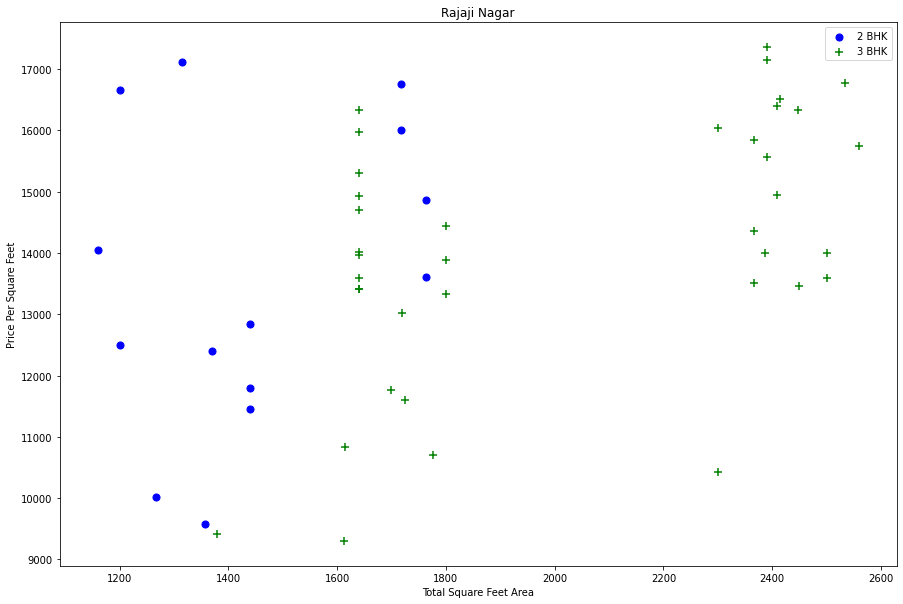

In [42]:
# now we see, for a particluar location
#    whether the 3 bdrm price is more than the 2 bdrm price for the same sqft area

def plot_scatter_chart(df,location):
    #created 2 new dataframes where for same location, we have 2 bdrm & 3 bdrm datapoints,
    
    bhk2 = df[(df.location==location) & (df.bhk==2)] 
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    
    #then, we plot scatter plots
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker='+',color='green',label='3 BHK', s=50)
    
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,"Rajaji Nagar") 
#plot_scatter_chart(df7,"Hebbal")

In [43]:
# there are some cases like this ---> in the plot, we can see that like, at around 1700 total sqft area, the 2 bdrm points(blue) are having higher price than the 3 bdrm(green) points
  
    # so, we create a function for-
    # removing properties where for same location, the price of (for e.g,) 3 bdrm apartment is less than 2 bdrm apartment (with same sqft area).
    # we will do - for a given location, we will built a dictionary of stats per bhk, i.e,
    
    #   {
    #      '1':{'mean':4000, 'std': 2000, 'count':34},
    #      '2':{'mean':4300, 'std':2300, 'count':22},
    #     }
    
    # now, we can remove those 2 bhk apartments whose price_per_sqft is < mean price_per_sqft of 1 bhk apartment


In [44]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')


df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

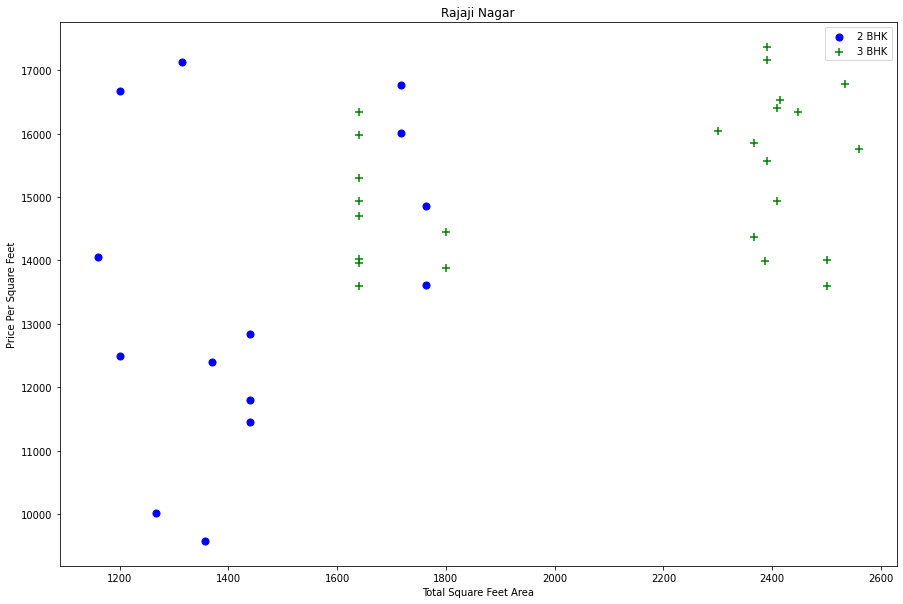

In [45]:
#to see what kind of improvement has been done----we do scatter plot again

plot_scatter_chart(df8,"Rajaji Nagar")     
#plot_scatter_chart(df8,"Hebbal")         #  some abnormalities might still be there, but it's ok to have such abnormalities

Text(0, 0.5, 'Count')

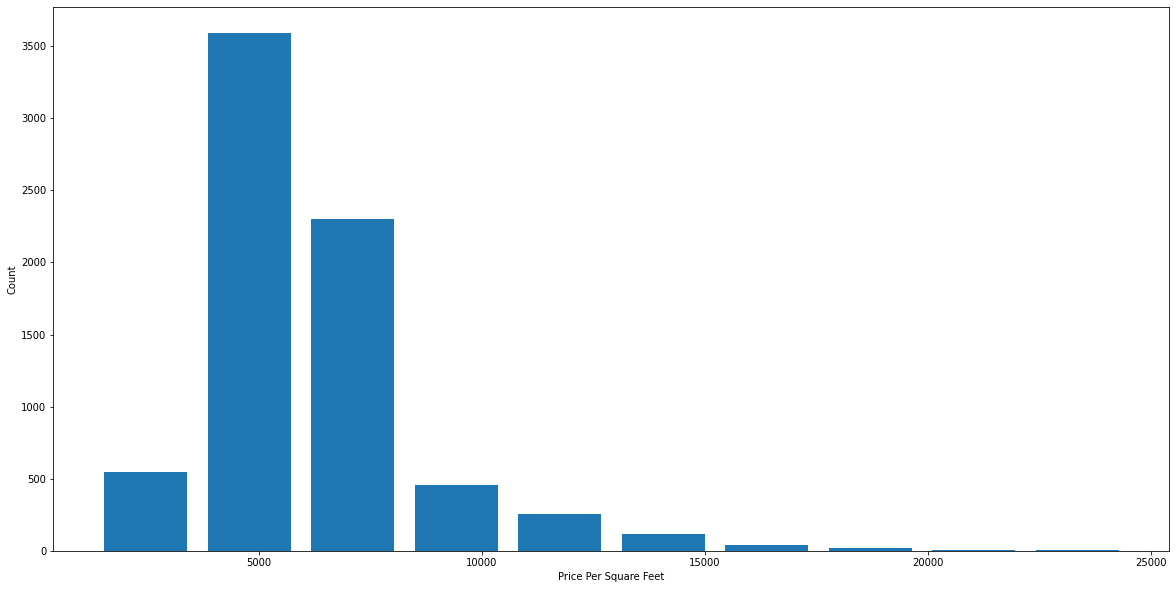

In [46]:
# the outliers are removed.
# Now, we would make a histogram to see how many apartments/properties we have per sq ft area

import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)       # we can see between 0 to 10000, the count is max, and we can see it's a bell shaped curve/gaussian curve/normal distribution

plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [47]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [48]:
# we are curious about the number of bathrooms
# so, let's see how many houses have > 10 bathooms

df8[df8.bath > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

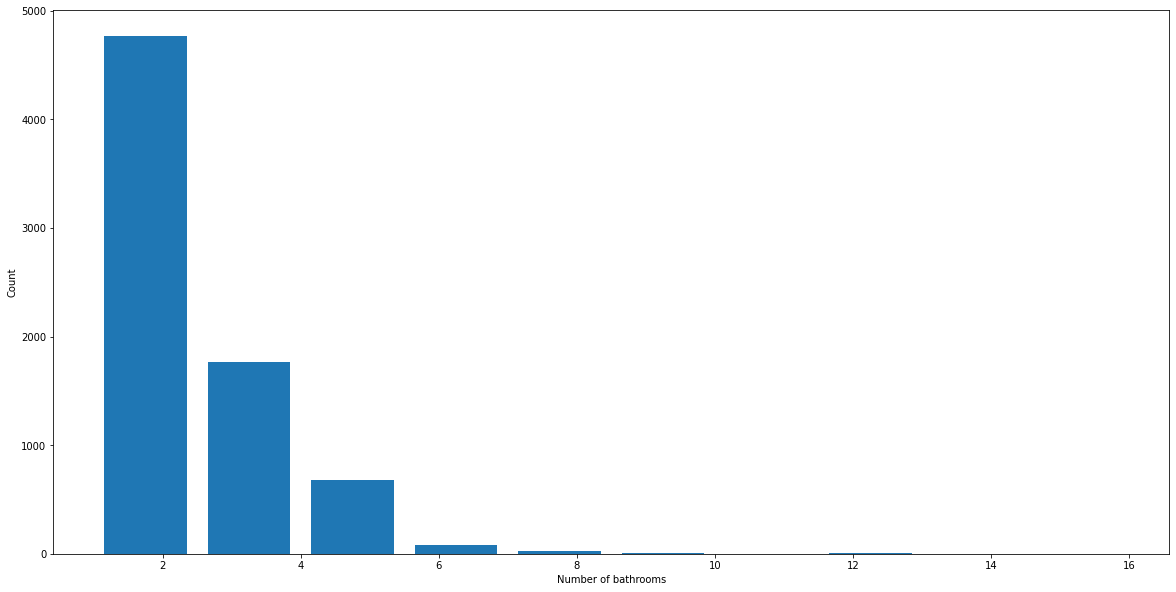

In [49]:
# let's say, we have 2 bedrooms and 4 athrooms- this is kind of unusual
#  let's say after discussing with the business manager, we decide that
#  anytime we have no of bathrooms > bedrooms + 2, we are going to REMOVE them


   # first we see the amount of bathrooms in properties
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [50]:
df8[df8.bath>df8.bhk+2]     # so, all of these are the outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [51]:
# to remove the outliers

df9 = df8[df8.bath < df8.bhk+2]
df9.shape

(7251, 7)

In [52]:
#####     ------ Now, my dataset looks pretty much clean
    #     so, we can now prepare it for Machine Learning training
    
 # for that, we need to drop some unnecessary features,,,like,,
#here, size, price_per_sqft   

df10 = df9.drop(['size','price_per_sqft'],axis = 'columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [53]:
loc_dummies = pd.get_dummies(df10.location)   #on the basis of location, place 1s and 0s,,,,where the locatio is 1st block jayanagar, it will be showing 1 & remaining will be 0s
loc_dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# now, we concatenate

#df11 = pd.concat([df10,loc_dummies],axis='columns')

#to avoid a dummy variable trap, we should take 1 less column from the dummies dataset,
# we drop here, the last column 'other'

df11 = pd.concat([df10,loc_dummies.drop('other',axis = 'columns')],axis = 'columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# since we used dummy for location, now
# we can drop the 'location' column

df12 = df11.drop('location', axis='columns')
df12

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df12.shape

(7251, 245)

In [57]:
# Move towards MODELLING



# our dependent variable is 'price'

#x should have only the independent variables,  so we drop 'price' from the dataset
X =  df12.drop('price',axis='columns')
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
y = df12.price
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10232     70.0
10233    200.0
10236    110.0
10237     26.0
10240    400.0
Name: price, Length: 7251, dtype: float64

In [59]:
# Train - Test SPLIT

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [60]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()   # model created
lr_clf.fit(X_train,y_train)   #train model with training data
lr_clf.score(X_test,y_test)   #score of the model, i.e, tells us how good our model is

0.8452277697874304

In [61]:
# we get score of ~ 84%, which is pretty good

# typically, a data-scientist would try
#   different couple of models with couple of different parameters
#     to come up with the best optimal model

In [62]:
# so, now, we are going to do
# k - fold Cross Validation

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)   #ShuffleSplit randomize the samples so that each of the fold have equal distribution of the data samples. So, it's Not targeted in one area.

cross_val_score(LinearRegression(), X, y, cv=cv)  # we can see, mostly, we are kind of getthing >80% score all the time, for 5-fold cross validation

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [63]:
# tring other regression techniques & see which one gives us much better result

#GridSearchCV   ---->  is a technique to search through the best parameter values from the given set of the grid of parameters. It is basically a cross-validation method. the model and the parameters are required to be fed in. Best parameter values are extracted and then the predictions are made.

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso      #we are doing lasso regression and decision tree regression now
from sklearn.tree import DecisionTreeRegressor

   # function/method to tell us which algorithm among them is the best
def find_best_model_using_gridsearchcv(X,y):
    algos = {
                'linear_regression' : {
                                        'model': LinearRegression(),
                                        'params':{
                                                  'normalize': [True,False]
                                                }
                                      },
            
            
                'lasso' : {
                            'model' : Lasso(),
                            'params':{
                                      'alpha':[1,2],
                                      'selection':['random','cyclic']
                                     }
                          },
            
            
                'decision_tree' : {
                                    'model': DecisionTreeRegressor(),
                                    'params':{
                                              'criterion':['mse','friedman_mse'],
                                               'splitter':['best','random']
                                             }
                    
                                  }
            }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name , config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append( {
                         'model': algo_name,
                         'best_score': gs.best_score_,
                         'best_params': gs.best_params_ 
                       } )
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\NC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\NC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior

C:\Users\NC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': True}
1,lasso,0.687429,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.729249,"{'criterion': 'mse', 'splitter': 'random'}"


In [64]:
#  so, we can see that -----
# Linear Regression is the best model as it has 81.8354% best score among all the 3 models.
# and the best parameters for this best model -> {'normalize': False}

In [65]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [66]:
# so, we can see it's like 0,1,2,3,4,5....for 'total sqft','bath',......
np.where(X.columns == '2nd Phase Judicial Layout')[0][0]

5

In [67]:
# Now, we already trained our Linear Regression model------ ( see above--- In [84])

#       so, now, we are going to make property price prediction 
#                    for couple of samples just to test it out.
#           for that, we write a function -->

def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]


###### The prices are in lakhs

In [68]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)  #2 bedroom, 2 bathroom

C:\Users\NC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677178024

In [69]:
predict_price('1st Phase JP Nagar', 1000, 2, 3)  #2 bedroom, 3 bathroom

C:\Users\NC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.72616900753572

In [70]:
predict_price('Indira Nagar', 1000, 2, 2)  #2 bedroom, 2 bathroom
# note: the price is in lakhs

C:\Users\NC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.27815484006874

In [71]:
predict_price('1st Phase JP Nagar', 1000, 3, 2)  #3 bedroom, 2 bathroom

C:\Users\NC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.57807171629096

###  for further:

In [72]:
#######  now, we will
#          EXPORT our artifacts/ model to a Pickle file,
#             the, it will be used by our 
#                         Python FLASH Server


In [73]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)
    
#a PICKLE file gets created in our directory (DS_Projects ---> bengaluru_house_price_proj-->  )

# the pickle file created is, we can see, of 5 kB,,,
#it's small, bcoz, this linear regression model is just storing the coefficients and intercept and all those parameters.
#it doesNOT have our Actual Data.

In [74]:
# besides the model, the columns are also very important
#   so, we export that information into a JSON file

import json
columns = {
            'data_columns' : [col.lower() for col in X.columns]  #converting the columns into lower case, bcoz it's better if they are all in same lower/upper-case
          }
with open("columns.json","w") as f:
    f.write(json.dumps(columns))
    
    
#json file created !

In [75]:
# next step: write a Python Flask Server

